In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
df_oecd = pd.read_csv("oecd_bli_2015.csv", thousands=',')
df_gdp = pd.read_csv("gdp_per_capita.csv", thousands= ',', delimiter='\t', encoding='latin1', na_values="n/a")
df_gdp


,Country\tSubject Descriptor\tUnits\tScale\tCountry/Series-specific Notes\t2015\tEstimates Start After
0,Afghanistan\tGross domestic product per capita...
1,"Albania\tGross domestic product per capita, cu..."
2,"Algeria\tGross domestic product per capita, cu..."
3,"Angola\tGross domestic product per capita, cur..."
4,Antigua and Barbuda\tGross domestic product pe...
...,...
185,"Vietnam\tGross domestic product per capita, cu..."
186,"Yemen\tGross domestic product per capita, curr..."
187,"Zambia\tGross domestic product per capita, cur..."
188,"Zimbabwe\tGross domestic product per capita, c..."


In [27]:
#Preparation des donnees

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
    

In [28]:
country_df = prepare_country_stats(df_oecd, df_gdp)


KeyError: "None of ['Country'] are in the columns"

In [6]:
# y = x + b
Y = np.c_[country_df["GDP per capita"]]
X = np.c_[country_df["Life satisfaction"]]

NameError: name 'country_df' is not defined

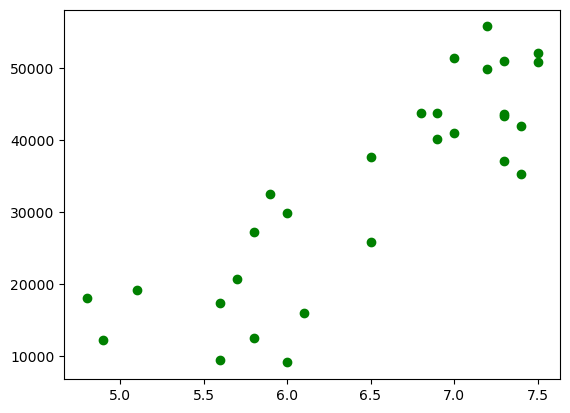

In [ ]:
plt.plot(X,Y,"og")
plt.show()